# <strong> 1 Introduction to the Finite Difference Method </strong>

The **finite difference method** is a numerical technique developed to solve problems governed by partial differential equations. Similar to the finite element method, it addresses these problems by discretizing the problem's domain into small parts and approximating the derivatives of the governing equations, in this method, using Taylor series expansions. A drawback of the finite difference method is that it is often limited to simple geometries and highly regular meshes. For example, let the equation that describes the 2D steady-state pure heat conduction be:

$$ 
\frac{\partial^2 T(x,y)}{\partial x^2} +  \frac{\partial^2 T(x,y)}{\partial y^2} = 0 \tag{1}
$$

Consider that we want to find the first order derivative $ T'(x) $ at the point $ x = i $​. To achieve this, we will approximate the unknown function using a **forward Taylor series expansion**:

$$ 
T( x + \Delta x ) \approx T ( x ) + \left[ \frac{\partial T}{\partial x} \right |_{x} \Delta x + \left[ \frac{\partial ^2 T}{\partial x^2} \right |_x \frac{\Delta x^2}{2!} + \left[ \frac{\partial ^3 T}{\partial x^3} \right |_x \frac{\Delta x^3}{3!} + \dots \tag{2} 
$$

Isolating the term that contains the first-order derivative and truncating the series at the second-order derivative term, we obtain an expression that describes the first-order derivative. Note that this approximation will have an error of order $\Delta x$, denoted as $ O (\Delta x) $. The order and the absolute value of the error depend on the number of terms included in the truncation and the refinement of the mesh.
$$
\left[ \frac{\partial T}{\partial x} \right |_{x} = \frac{T( x + \Delta x ) - T(x)}{\Delta x} - \left[ \frac{\partial ^2 T}{\partial x^2} \right |_x \frac{\Delta x}{2!} = \frac{T( x + \Delta x ) - T(x)}{\Delta x} - O (\Delta x) \tag{3}
$$

We can achieve a similar result by approximating the unknown function using a **backward Taylor series expansion**:

$$ 
T( x - \Delta x ) = T ( x ) - \left[ \frac{\partial T}{\partial x} \right |_{x} \Delta x + \left[ \frac{\partial ^2 T}{\partial x^2} \right |_x \frac{\Delta x^2}{2!} - \left[ \frac{\partial ^3 T}{\partial x^3} \right |_x \frac{\Delta x^3}{3!} + \dots \tag{4} 
$$

In a similar manner, isolating the term that contains the first-order derivative and truncating the series at the second-order derivative term, we obtain another expression that describes the first-order derivative:

$$
\left[ \frac{\partial T}{\partial x} \right |_{x} = \frac{ T(x) - T( x + \Delta x)}{\Delta x} +   \left[ \frac{\partial ^2 T}{\partial x^2} \right |_x \frac{\Delta x}{2!} =  \frac{ T(x) - T( x - \Delta x)}{\Delta x} + O (\Delta x) \tag{5}
$$

In fact, we can also increase the order of error (and consequently reduce the absolute value of the error) by linear combining forward and backward expansions before isolating the first-order derivative we want to determine. This results in a **central Taylor series expansion**:

$$
\left[ \frac{\partial T}{\partial x} \right |_{x} = \frac{T( x + \Delta x ) - T( x - \Delta x )}{2 \Delta x} - O(\Delta x^2) \tag{6}
$$

<div style="text-align: center;">
    <img src="images/forward, backward, central.svg" alt="Descrição da Imagem" width="750"/>
</div>

Going back to the heat conduction equation we mentioned before, applying the techniques exposed so far, we obtain the following central approximation for the second-order derivatives of the equation:

$$
\boxed{\frac{T( x + \Delta x ) - 2 T(x) + T( x - \Delta x )}{\Delta x^2} + \frac{T( y + \Delta y ) - 2 T(y) + T( y - \Delta y )}{\Delta y^2} = 0}  \tag{7}
$$

## <strong> 1.2 Explicit and Implicit Approach</strong> 

When dealing with problems that evolve over time (transient problems), we have two possible approaches to approximating the governing equation: **explicit** (which relies on information from the previous time-step to compute the current time-step) and **implicit** (which relies on information from the current time-step to compute the current-time step). For example, let the equation that describes the 1D pure heat conduction be:

$$
\rho c_p \frac{\partial T(x,t)}{\partial t} = k  \frac{\partial^2 T(x,t)}{\partial x^2} \tag{1}
$$

To implement an **explicit approach**, we're goint to use the **forward Taylor series expansion** for the time term and the **central Taylor series expansion for the spatial term**, so that we obtain:

$$
\begin{align}
    & \text{Forward approximation:} \quad \frac{\partial T(x_i,t_j)}{\partial t} = \frac{T( x_i,t_j + \Delta t ) - T(x_i,t_j)}{\Delta t} \tag{2}\\
    & \text{Central approximation:} \quad \frac{\partial^2 T(x_i,t_j)}{\partial x^2}  = \frac{T( x_i - \Delta x, t_j ) - 2T( x_i, t_j ) + T( x_i + \Delta x, t_j )}{\Delta x^2} \tag{3}
\end{align}
$$

Substituting the two equations into the governing equation and rearranging it to isolate the time-step $(t+1)$ term, we obtain:

$$
\boxed{
T(x_i, t_j + \Delta t) = T(x_i, t_j) + k \frac{\Delta t}{\rho c_p \Delta x^2} \left[ T(x_i + \Delta x, t_j) - 2T( x_i, t_j ) + T( x_i - \Delta x, t_j )   \right] \tag{4}
}
$$

Note that all the terms on the right-hand side of the equation depend on the previous time-step, that is, the next time-step is predicted based on the previous one, which defines an explicit approach. This approach is simpler and computationally cheaper but suffers significantly from instability and divergence. In general, the coefficients that multiply the terms can strongly indicate divergence if they are negative.


$$
T(x_i, t_j + \Delta t) = 
\left[1 - 2 k \frac{ \Delta t}{\rho c_p \Delta x^2}  \right]  T(x_i, t_j)   

+ \left[k \frac{ \Delta t}{\rho c_p \Delta x^2} \right] T(x_i + \Delta x, t_j) 
+ \left[k \frac{ \Delta t}{\rho c_p \Delta x^2} \right] T( x_i + \Delta x, t_j )  \tag{5}
$$

In this particular case, the only term that can be negative is $T(x_i, t_j)$, as it is the only one multiplied by a negative coefficient. Hence, to guarantee the model's convergence, we need to establish that:

$$
\boxed{
1 - 2 \frac{k \Delta t }{\rho c_p \Delta x^2} \geq 0 \iff \frac{k \Delta t }{\rho c_p \Delta x^2} \leq \frac{1}{2}
} \tag{6}
$$

Note that the term $\Delta x^2$ appears as a divisor in the convergence condition. It is generally true that refining the spatial mesh improves convergence. *However, in the case of an explicit approach, it is also necessary to refine the time-steps $\Delta t$ accordingly*, otherwise, the condition above may not be satisfied and the model may diverge.
___
To implement an **implicit approach**, we're going to use the **backward Taylor series expansion for the time term** and the **central Taylor series expansion for the spatial term**, so that we obtain:

$$
\begin{align}
    & \text{Backward approximation:} \quad \frac{\partial T(x_i,t_j)}{\partial t}= \frac{ T(x_i,t_j) - T( x_i,t_j - \Delta t)}{\Delta t} \tag{7} \\

    & \text{Central approximation:} \quad\frac{\partial^2 T(x_i, t_j)}{\partial x^2}= \frac{T( x_i - \Delta x, t_j ) - 2T( x_i, t_j ) + T( x_i + \Delta x, t_j )}{\Delta x^2} \tag{8}
\end{align} 
$$

Substituting the two equations into the governing equation and rearranging it to isolate the time-step $(t)$ term (in this case we're considering the current time-step as $j$ subscript not $j+1$), we obtain:

$$
\boxed{
T(x_i, t_j) = T(x_i, t_j - \Delta t) + k \frac{\Delta t}{\rho c_p \Delta x^2} \left[ T(x_i + \Delta x, t_j) - 2T( x_i, t_j ) + T( x_i - \Delta x, t_j )   \right]
} \tag{9}
$$

Note that in the above equation, there are no potentially negative terms, which indicates that we will not encounter divergence issues related to this. Although it is computationally somewhat more expensive, we achieve a rather stable evolution of the results.

---

Para implementar o método de **Cranck-Nicholson** para diferenças finitas, que é a combinação do método regressivo e progressivo, aplicamos a expansão de sério de Taylor central para o termo temporal e também central para o termo espacial no ponto médio:

$$
\frac{\partial T}{\partial t} (x_i, t_{j+1/2}) = \frac{T(x_i, t_{j + 1/2} + \frac{1}{2} \Delta t) - T(x_i, t_{j+1/2}-\frac{1}{2} \Delta t)}{2 \frac{1}{2} \Delta t} = \frac{T(x_i, t_{j+1})- T(x_i, T(x_i, t_j))}{\Delta t}
$$


$$
\frac{\partial^2 T}{\partial t^2} (x_i, t_{j+1/2}) = \frac{1}{2} \left[ \frac{T(x_i - \Delta x, t_j) - 2T(x_i, t_j) + T(x_i+\Delta x, t_j)}{\Delta x^2} + \frac{T(x_i - \Delta x, t_{j+1}) - 2T(x_i, t_{j+1}) + T(x_i+\Delta x, t_{j+1})}{\Delta x^2} \right]
$$

Tanto o método implícito regressivo e de Cranck-Nicholson não enfrentam problemas de divergência. O método de Crank-Nicolson é frequentemente adotado devido sua estabilidade e precisão nas aproximações.


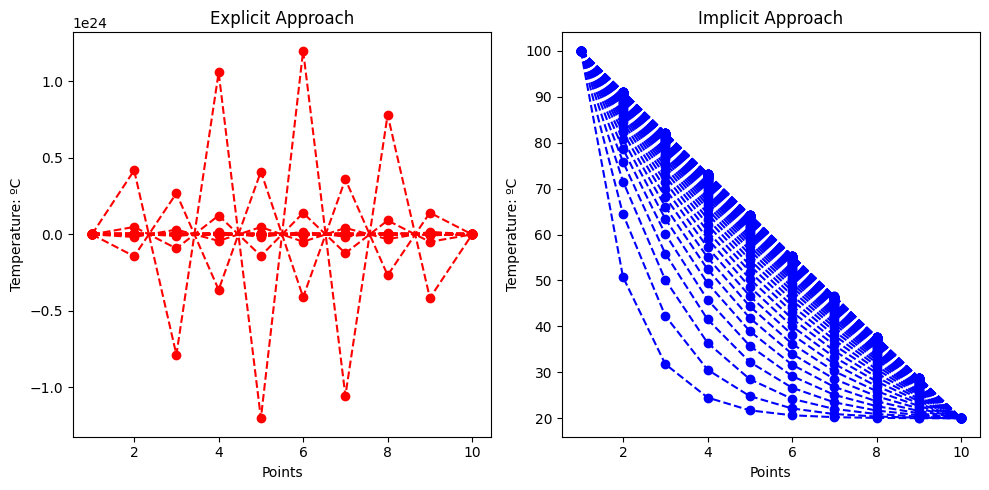

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# material properties
rho = 10
cp = 800
L = 0.1
k = 10

# mesh properties
nx = 10
dt = 0.1
tempomax = 5
'''
    We can change the values of nx and dt to achieve convergence or divergence in the explicit method
'''
# initial some matrices
T_explicit = np.zeros((nx), float)
T_implicit = np.zeros((nx), float)

T_explicit_old = np.zeros((nx), float)
T_implicit_old = np.zeros((nx), float)

T_explicit_ant = np.zeros((nx), float)
T_implicit_ant = np.zeros((nx), float)

pontos = list(range(1, nx + 1))

erro_explicit = np.zeros(nx, float)
erro_implicit = np.zeros(nx, float)

# initial condition
Tinicial = 20 #ºC
tempo = 0

dx = L / (nx - 1)

iteration_explicit = 0
iteration_implicit = 0

# set the plot envirioment
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  # 1 linha, 2 colunas

# set initial condition to all nodes
for i in range (0, nx-1):

    T_explicit[i] = Tinicial
    T_implicit[i] = Tinicial

    T_explicit_old[i] = 0
    T_implicit_old[i] = 0

    T_explicit_ant[i] = Tinicial
    T_implicit_ant[i] = Tinicial

# start iteration
while tempo < tempomax:

    erromax_explicit = 10
    erromax_implicit = 10
    tempo += dt

    # boundary condition
    T_explicit[0] = 100
    T_implicit[0] = 100

    T_explicit_ant[0] = 100
    T_implicit_ant[0] = 100

    T_explicit[nx-1] = 20
    T_implicit[nx-1] = 20
   
    # iteration explicit method
    while erromax_explicit > 0.0001:
        
        iteration_explicit += 1

        # central points of the mesh
        for i in range(1, nx-1):

            T_explicit[i] = T_explicit_ant[i] + (dt * k / (rho * cp * dx**2)) * (T_explicit_ant[i+1] - 2 * T_explicit_ant[i] + T_explicit_ant[i-1])

        for i in range(1, nx-1):

            erro_explicit[i] = abs(T_explicit[i] - T_explicit_old[i])
            T_explicit_old[i] = T_explicit[i]

        erromax_explicit = max(erro_explicit)
        
    for i in range(1, nx-1):

        T_explicit_ant[i] = T_explicit[i]

    ax1.plot(pontos, T_explicit, marker='o', linestyle='--', color='red')

    # iteration implicit method
    while erromax_implicit > 0.0001:
        
        iteration_implicit += 1

        # central points of the mesh
        for i in range(1, nx-1):
            
            T_implicit[i] = ((rho * cp / dt) * T_implicit_ant[i] + (k /(dx**2)) * (T_implicit[i+1] + T_implicit[i-1])) / ((rho * cp / dt) + 2 * (k / dx**2)) 

        for i in range(1, nx-1):
            
            erro_implicit[i] = abs(T_implicit[i] - T_implicit_old[i])
            T_implicit_old[i] = T_implicit[i]
        
        erromax_implicit = max(erro_implicit)

    for i in range(1, nx-1):
        
        T_implicit_ant[i] = T_implicit[i]

    ax2.plot(pontos, T_implicit, marker='o', linestyle='--', color='blue')
        
# Plotar o primeiro gráfico no primeiro subplot
ax1.set_title('Explicit Approach')
ax1.set_xlabel('Points')
ax1.set_ylabel('Temperature: ºC')

# Plotar o segundo gráfico no segundo subplot
ax2.set_title('Implicit Approach')
ax2.set_xlabel('Points')
ax2.set_ylabel('Temperature: ºC')

# Adicionando título e rótulos dos eixos
plt.tight_layout()

# Mostrando o gráfico
plt.show()


## <strong>1.3 Boundary Conditions</strong>

The **Dirichlet boundary condition** specifies the temperature directly at the boundary. This type of boundary condition is particularly useful when the temperature at a given boundary is known and fixed, such as in the case of a surface maintained at a constant temperature.

$$
T(x_i) = T_{boundary} \quad \text{for} \quad x_i \in \partial \Omega \tag{1}
$$

Where $\partial \Omega$ represents the boundary of the domain $\Omega$ and $T_{boundary}$ is the prescribed value at the boundary.

---

The **Neumann boundary condition** specifies the value of the normal derivative of the temperature at the boundary, which directly relates to the heat flux through the surface. Mathematically, in a 1D pure heat conduction problem, the Neumann boundary condition is expressed as:

$$
\frac{\partial T(x_i,t_j)}{\partial x} = q \tag{2}
$$

Where $q$ represents the heat flux normal to the surface. In the specific case where the heat flux at the boundary is zero (adiabatic), the condition simplifies to:

$$
\frac{\partial T(x_i,t_j)}{\partial x} = 0 \tag{3}
 $$

In a discrete context using finite differences, this condition can be approximated as the equation below. Where $ \mathbin{\partial T / \partial x}$  represents the temperature gradient normal to the boundary and $x_i$ is the position on the mesh. For a discrete mesh, the spatial derivative can be approximated using backward finite differences as below:

$$
0 = -k \frac{\partial T(x_i,t_j)}{\partial x} \approx -k \frac{T_i - T_{i-1}}{\Delta x} = T_i - T_{i-1} \longrightarrow \boxed {T_i = T_{i-1}} \tag{4}
$$

Note that, in this case, the temperature at the last point of the mesh (on the right) is equal to the temperature at the previous point. One important detail to be aware of is that, depending on whether you are applying the boundary condition at the leftmost or rightmost point, you must use the forward or backward difference method, respectively.

---

The **Robin boundary conditions** (also called mixed boundary conditions) are expressed as a combination of Dirichlet and Neumann conditions. In the case of heat transfer, this often represents the effect of convection or radiation. Consider a 1D steady-state metal rod with heat generation at a constant rate $S (W/m^3)$. The governing equation is given by:


$$
k \frac{\partial^2 T}{\partial x^2} + S = 0 \tag{5}
$$


Approximating the governing equation using a central Taylor series expansion, we get:

$$
k \frac{\partial^2 T}{\partial x^2} + S = 0 \rightarrow k \left[ \frac{T_{i+1} + 2T_i + T_{i-1}}{\Delta x^2} \right] + S \rightarrow  T_i = \frac{S_i \Delta x^2}{2k} + \left[ \frac{T_{i+1} + T_{i-1}}{2} \right] \tag{6}
$$


The temperature is prescribed at the left boundary (Dirichlet condition). At the right boundary, we apply the Robin condition as:


$$
-k \left[ \frac{\partial T(x_i)}{\partial x} \right|_{x_{boundary}} = - h (T_{\infty} - T_{x_{boundary}}) \tag{7}
$$

Discretizing this boundary condition at the last point on the right using backward difference:


$$
k \left[ \frac{T_{i-1} + T_{i}}{\Delta x} \right] + h(T_{\infty} - T_i) + \frac{S_i \Delta x}{2} = 0 \tag{8}
$$


If we were to apply the boundary condition as the flux prescribed instead of temperature at the left boundary point (the first point of the one-dimensional mesh). In this case, using forward method, the equation would be:

$$
q_0 = k \frac{T_{i+1} - T_i }{\Delta x} + \frac{S_i \Delta x} {2} = 0 \tag{9}
$$


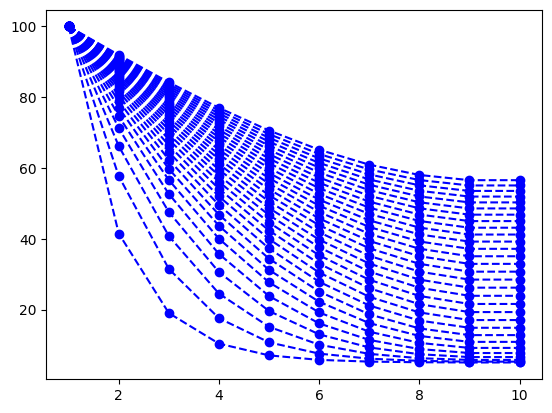

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# material properties
rho = 10
cp = 800
L = 0.1
k = 10

# mesh properties
nx = 10
dt = 0.1
tempomax = 3
'''
The higher the tempomax value the closer the model gets to a stationary state
'''

# initial some matrices
T_implicit = np.zeros((nx), float)
T_implicit_old = np.zeros((nx), float)
T_implicit_ant = np.zeros((nx), float)
pontos = list(range(1, nx + 1))

erro_implicit = np.zeros(nx, float)

# initial condition
Tinicial = 5 #ºC
tempo = 0
dx = L / (nx - 1)
iteration_implicit = 0


# set initial condition to all nodes
for i in range (0, nx-1):
    T_implicit[i] = Tinicial
    T_implicit_old[i] = 0
    T_implicit_ant[i] = Tinicial

# start iteration
while tempo < tempomax:

    erromax_implicit = 10
    tempo += dt

    # boundary condition
    T_implicit[0] = 100
    T_implicit_ant[0] = 100
    T_implicit[nx-1] = 20

    # iteration implicit method
    while erromax_implicit > 0.0001:
        
        iteration_implicit += 1

        # central points of the mesh
        for i in range(1, nx-1):
            
            T_implicit[i] = ((rho * cp / dt) * T_implicit_ant[i] + (k /(dx**2)) * (T_implicit[i+1] + T_implicit[i-1])) / ((rho * cp / dt) + 2 * (k / dx**2)) 

        i = nx
        T_implicit[i-1] = T_implicit[i-2] # neuman boundary condition

        for i in range(1, nx-1):
            
            erro_implicit[i] = abs(T_implicit[i] - T_implicit_old[i])
            T_implicit_old[i] = T_implicit[i]
        
        erromax_implicit = max(erro_implicit)

    for i in range(1, nx-1):
        
        T_implicit_ant[i] = T_implicit[i]

    plt.plot(pontos, T_implicit, marker='o', linestyle='--', color='blue')
        
# Mostrando o gráfico
plt.show()
